## Feature Matching

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_path = "../resource/img/messi5.jpg"
template_path = "../resource/img/template.png"
print(os.path.exists(img_path))
print(os.path.exists(template_path))

True
True


In [3]:
img1 = cv2.imread(template_path, 0)
img2 = cv2.imread(img_path, 0)

In [4]:
# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

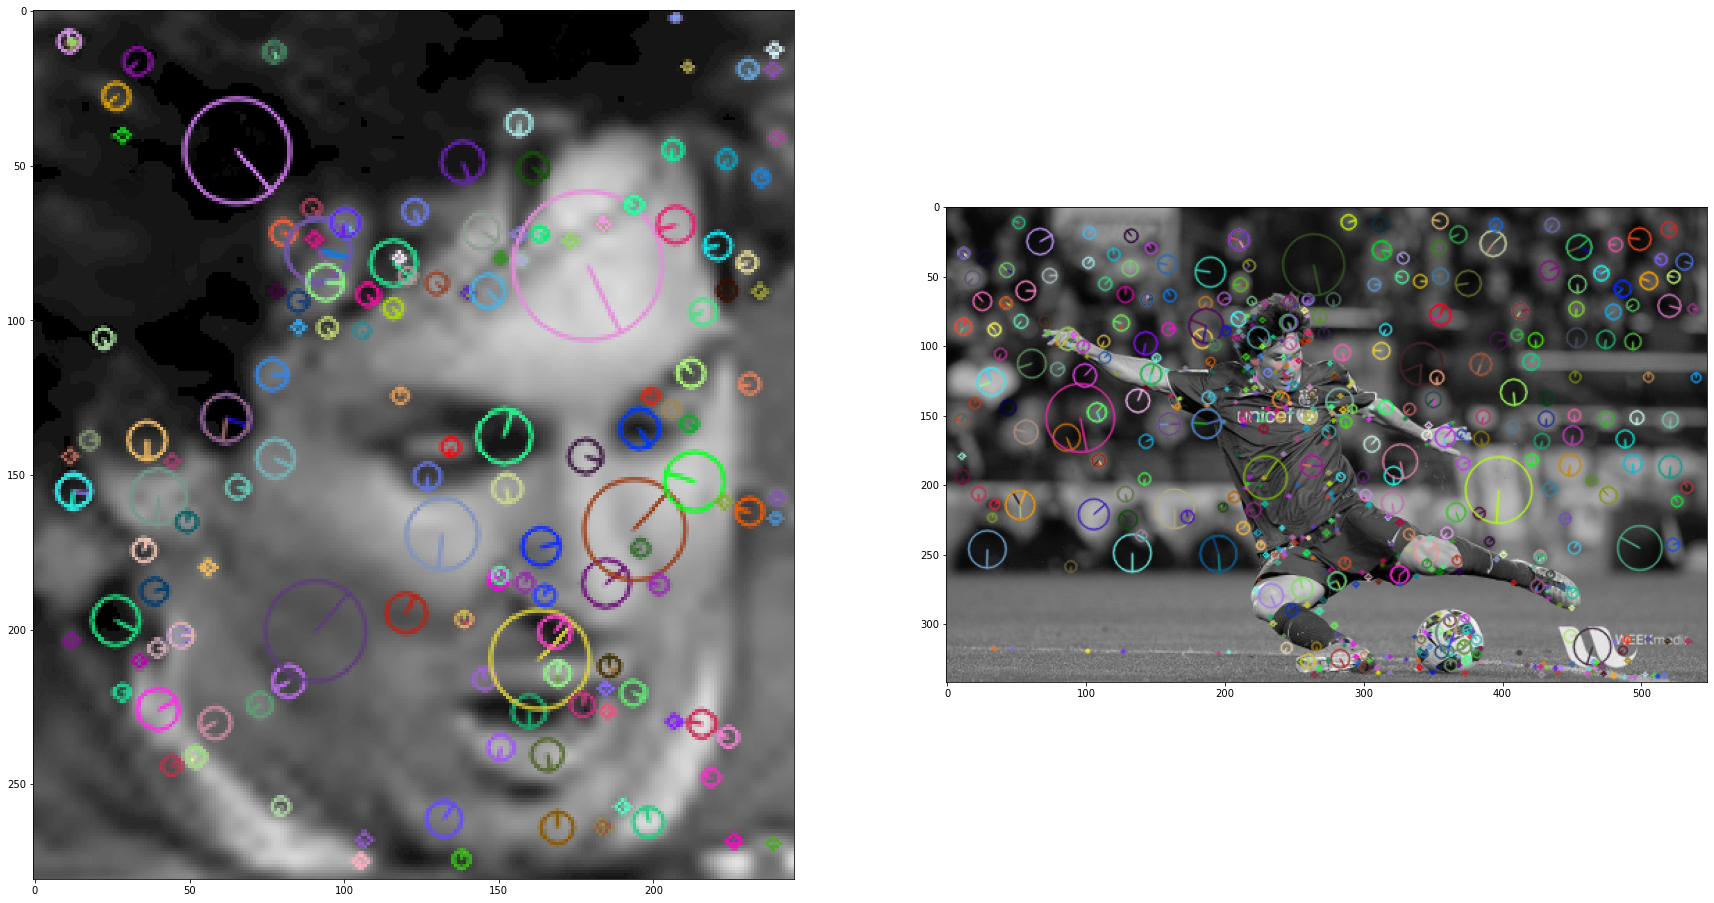

In [5]:
img1v = cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
img2v = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30, 26))
plt.subplot(1, 2, 1)
plt.imshow(img1v)
plt.subplot(1, 2, 2)
plt.imshow(img2v)

plt.show()

In [6]:
print(kp1[0])

<KeyPoint 000001EFC2C28C90>


In [7]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

In [8]:
good = []
for m, n in matches:
    #print(m.distance, n.distance)
    if m.distance < 0.85 * n.distance:
        good.append([m])

In [9]:
print(len(good))

31


In [10]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

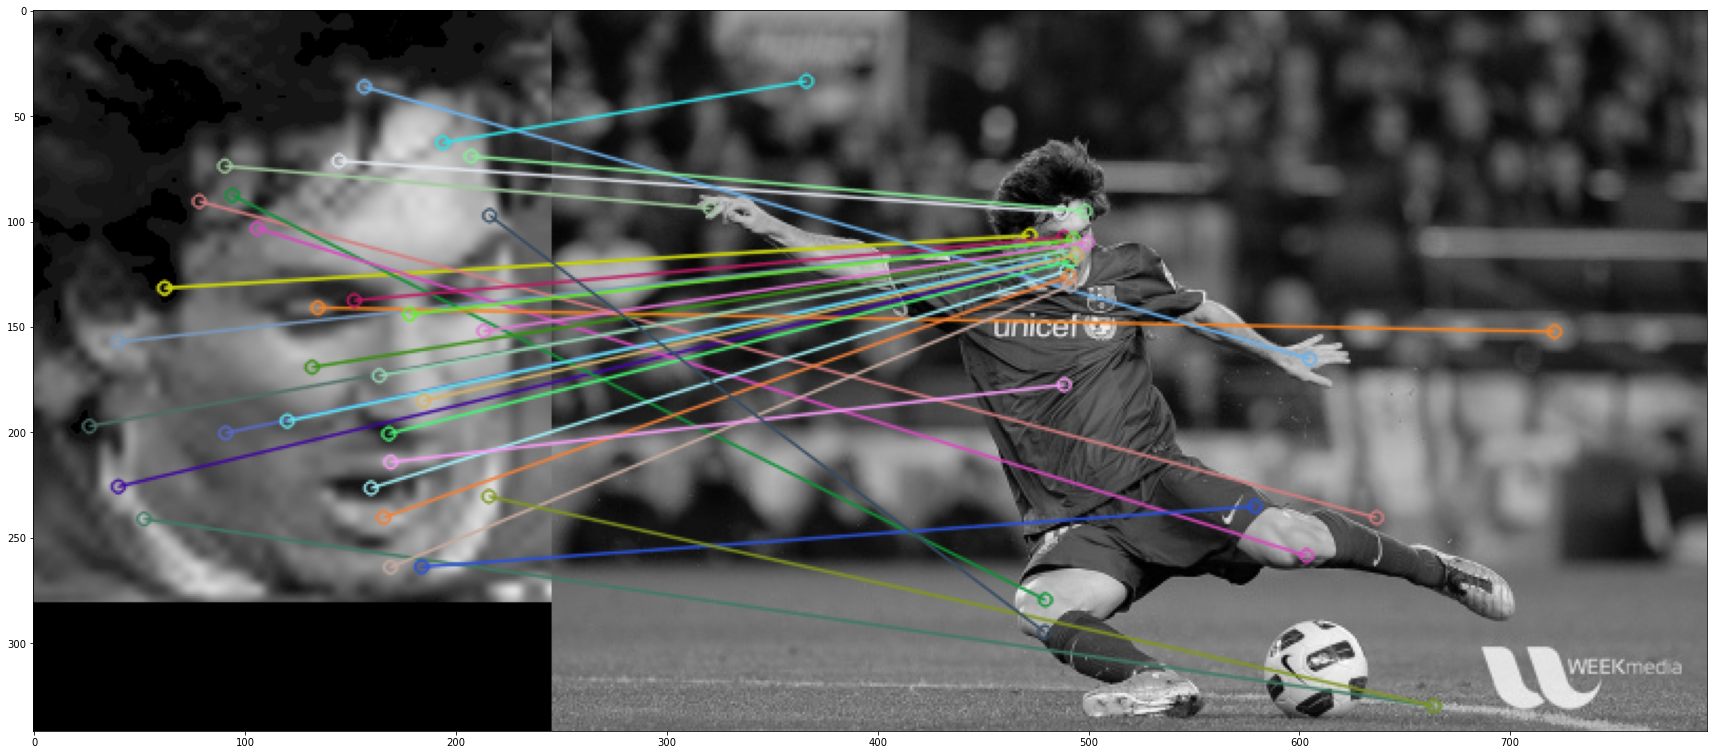

In [11]:
plt.figure(figsize=(30, 15))
plt.imshow(img3)
plt.show()